### Name-Gaurav Kumar
### Reg no-200810083601
### Enrollment no-20/10/MT/021
### Subject-Statistical Inference and Multivariate Techniques
### Assingment 2


<h2 style="color:red">Question</h2><h3 style="color:blue">Choose a dataset from any source on the internet which has several variables and datapoints.<br>
 a) Perform PCA to reduce the number of independent variables<br>
 b) On the dataset with reduced dimension, <br>
    <br>
  &nbsp; i) Perform a scatter plot (in two or three dimensions), and do cluster analysis<br>
   &nbsp;ii) Choose any one variable as dependent and the rest being independent and perform linear regression analysis</h3>

### a) Performing PCA to reduce the number of independent variables
   <p>I am using small data set pizz data set which have 300 rows and 9 columns. Using PCA I will try to reduce into 2 coloums</p>

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
df=pd.read_csv('Pizza.csv')
print(df.head(5))
print(df.shape)

  brand     id   mois   prot    fat   ash  sodium  carb   cal
0     A  14069  27.82  21.43  44.87  5.11    1.77  0.77  4.93
1     A  14053  28.49  21.26  43.89  5.34    1.79  1.02  4.84
2     A  14025  28.35  19.99  45.78  5.08    1.63  0.80  4.95
3     A  14016  30.55  20.15  43.13  4.79    1.61  1.38  4.74
4     A  14005  30.49  21.28  41.65  4.82    1.64  1.76  4.67
(300, 9)


In [48]:
br=df['brand']
data=df.drop('brand',axis=1)
print(data.shape)
print(br.shape)

(300, 8)
(300,)


In [49]:
std_d=StandardScaler().fit_transform(data)
print(std_d.shape)

(300, 8)


In [50]:
sample_data=std_d
covar_matrix=np.matmul(sample_data.T,sample_data)
print("the shape of covariance matrix=",covar_matrix.shape)

the shape of covariance matrix= (8, 8)


In [51]:
from scipy.linalg import eigh
values,vectors=eigh(covar_matrix,eigvals=(6,7))

print(vectors.shape)
vectors=vectors.T
print(vectors.shape)

(8, 2)
(2, 8)


In [52]:
new_coordinates=np.matmul(vectors,sample_data.T)
print(vectors.shape,"X",sample_data.shape, "=",new_coordinates.shape)

(2, 8) X (300, 8) = (2, 300)


In [53]:
new_co_dints=np.vstack((new_coordinates,br)).T
dataframe=pd.DataFrame(data=new_co_dints,columns=("1st_principle","2nd_principle","Brands"))
print(dataframe.head())

  1st_principle 2nd_principle Brands
0      2.683866      5.029003      A
1      2.533955      5.042441      A
2      2.678397       4.82421      A
3      2.289807      4.488378      A
4      2.163979      4.490815      A


C:\Users\gaura\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


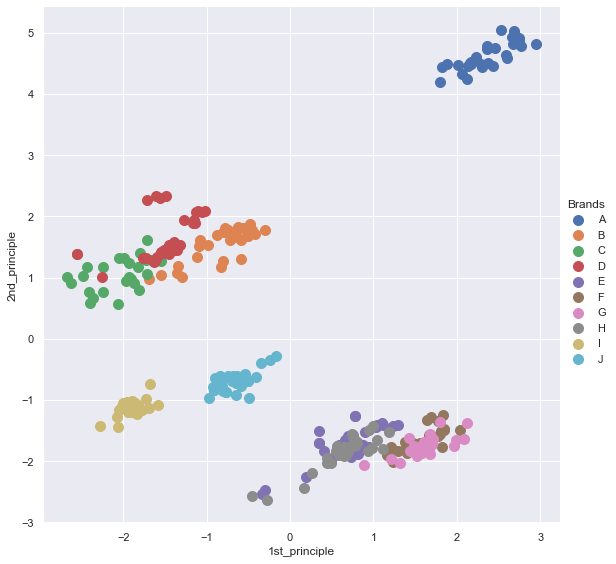

In [54]:
import seaborn as sn
sn.FacetGrid(dataframe,hue="Brands",size=8).map(plt.scatter,"1st_principle","2nd_principle",s=100).add_legend()

<b> In the above section i have perform PCA and reduce the dat set to 300X9 to 300X2 which is 2d data set and perform scatter plot graph</b>
### Now i am going to perform clustring analysis....as our question is 
### Perform a scatter plot (in two or three dimensions), and do cluster analysis
<b> I will do clustting by K MEAN anlaysis .For that i need to find K values whichs suits good on data for that i use elbow method</b>

C:\Users\gaura\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


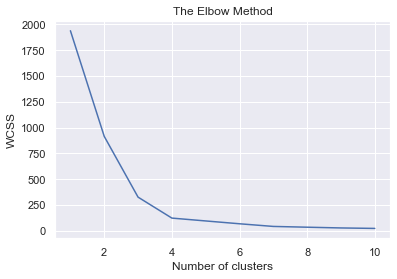

In [55]:

from pylab import *
import random as pyrandom
from scipy.spatial.distance import cdist
matplotlib.rc("image",cmap="gray")
from collections import Counter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
X=dataframe.iloc[:,0:2]

from sklearn.cluster import KMeans
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [56]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3]


### As elbow method with minimum deviation is at 4 to 6 . So we take k=4 and perform clusttring

In [57]:
%pylab inline
from pylab import *
import random as pyrandom
from scipy.spatial.distance import cdist
matplotlib.rc("image",cmap="gray")
from collections import Counter
import numpy as np
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


C:\Users\gaura\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['linalg', 'fft', 'random', 'power']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


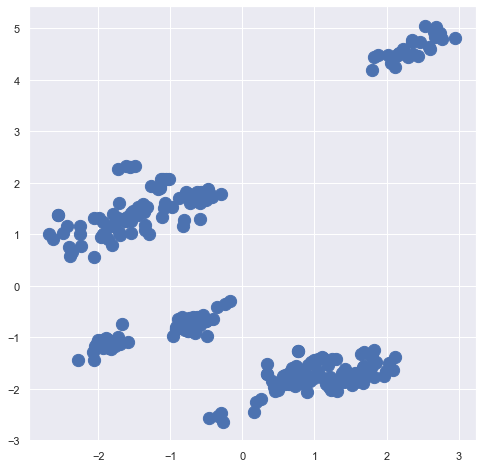

In [58]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans


plt.figure(figsize=(8, 8))

plt.scatter(dataframe['1st_principle'],dataframe['2nd_principle'],s=150)
#plt.xlim(-180,180)
#plt.ylim(-90,90)
plt.show()


In [59]:
x = dataframe.iloc[:,0:2] 
x

,1st_principle,2nd_principle
0,2.683866,5.029003
1,2.533955,5.042441
2,2.678397,4.82421
3,2.289807,4.488378
4,2.163979,4.490815
...,...,...
295,-0.541854,-0.573447
296,-0.245914,-0.348936
297,-0.526407,-0.68431
298,-0.916013,-0.845646


In [60]:
kmeans = KMeans(4)
kmeans.fit(x)

KMeans(n_clusters=4)

In [61]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### data set graph after perfoming clusttring where k=4 sub groups

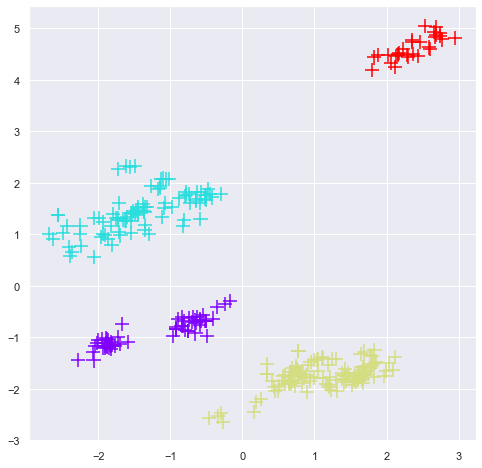

In [62]:
data_with_clusters = dataframe.copy()
data_with_clusters['Clusters'] = identified_clusters
plt.figure(figsize=(8, 8))
plt.scatter(data_with_clusters['1st_principle'],data_with_clusters['2nd_principle'],c=data_with_clusters['Clusters'],s=200,marker='+',cmap='rainbow')

### marker style for club pic code $\clubsuit$

<h2 style="color:red"> ii) Choose any one variable as dependent and the rest being independent and perform linear regression analysis</h2>

### Here I am going to perfoem linear regression on reduced data set .

In [63]:
dataframe

,1st_principle,2nd_principle,Brands
0,2.683866,5.029003,A
1,2.533955,5.042441,A
2,2.678397,4.82421,A
3,2.289807,4.488378,A
4,2.163979,4.490815,A
...,...,...,...
295,-0.541854,-0.573447,J
296,-0.245914,-0.348936,J
297,-0.526407,-0.68431,J
298,-0.916013,-0.845646,J


In [64]:
feature_cols = ['1st_principle']
X = dataframe[feature_cols]
y = dataframe['2nd_principle']
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)
print(lm.intercept_)
print(lm.coef_)

-3.789561257387201e-16
[-8.52810246e-17]


In [65]:
X_new = pd.DataFrame({'1st_principle': [2.16]})
X_new.head()

,1st_principle
0,2.16


In [66]:
lm.predict(X_new)

array([-5.63163139e-16])

In [45]:
X_new = pd.DataFrame({'1st_principle': [dataframe['1st_principle'].min(), dataframe['1st_principle'].max()]})
X_new.head()

,1st_principle
0,-2.677892
1,2.954283


In [46]:
preds = lm.predict(X_new)
preds

array([-1.50582765e-16, -6.30900381e-16])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


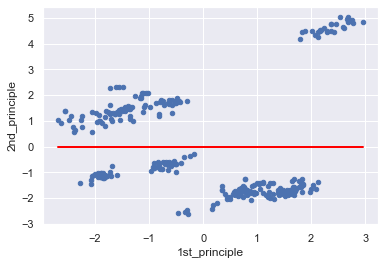

In [40]:
dataframe.plot(kind='scatter', x='1st_principle', y='2nd_principle')
plt.plot(X_new, preds, c='red', linewidth=2)


### Here my assingment is completed as per question. But sir as you see that the graph is not work properly this is because this data is not suitable for liner regression its show very high error at linear regression. As I predict the value of 'X' at 2.16 ,it shows predicted values of y is -5 where as original data has values is 4 .This is high error rate which shows that this data is not good fit for linera regression ,it may required multi regression or laso regression. 

### That's why i decided for adding one cloumn from the original data and then perform Linear regression . And after adding column then I perform the linear regression then it's work properly.

### Given below is code for that

In [83]:
df1=pd.read_csv('Pizza.csv')
df1.drop(["brand", "id","mois","prot","ash","sodium","carb","cal"], axis = 1, inplace = True)
dataframe['FAT']=df1['fat']
dataframe

,1st_principle,2nd_principle,Brands,FAT
0,2.683866,5.029003,A,44.87
1,2.533955,5.042441,A,43.89
2,2.678397,4.82421,A,45.78
3,2.289807,4.488378,A,43.13
4,2.163979,4.490815,A,41.65
...,...,...,...,...
295,-0.541854,-0.573447,J,17.00
296,-0.245914,-0.348936,J,18.46
297,-0.526407,-0.68431,J,16.03
298,-0.916013,-0.845646,J,15.18


In [84]:
###For data checking
#dataframe.head()
#dataframe.shape
#dataframe.info()

In [85]:
dataframe.isna().sum()

1st_principle    0
2nd_principle    0
Brands           0
FAT              0
dtype: int64

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='2nd_principle', ylabel='FAT'>

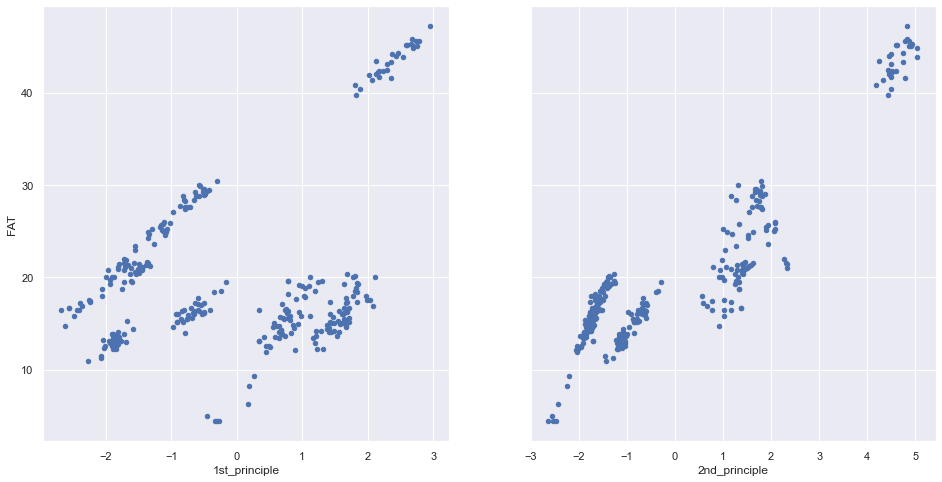

In [86]:
fig, axs = plt.subplots(1, 2, sharey=True)
dataframe.plot(kind='scatter', x='1st_principle', y='FAT', ax=axs[0], figsize=(16, 8))
dataframe.plot(kind='scatter', x='2nd_principle', y='FAT', ax=axs[1])


In [87]:
X=dataframe[['1st_principle']]
y=dataframe['FAT']
y


0      44.87
1      43.89
2      45.78
3      43.13
4      41.65
       ...  
295    17.00
296    18.46
297    16.03
298    15.18
299    15.50
Name: FAT, Length: 300, dtype: float64

In [88]:
# create X and y
feature_cols = ['1st_principle']
#feature_cols2 = ['2nd_principle']
X = dataframe[feature_cols]
y = dataframe['FAT']
#X2=dataframe[feature_cols2]

# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)
#lm.fit(X2,y)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

20.229533333333336
[2.09872984]


In [89]:
X_new = pd.DataFrame({'1st_principle': [2.5]})
X_new.head()

,1st_principle
0,2.5


In [90]:
lm.predict(X_new)

array([25.47635794])

In [91]:
X_new = pd.DataFrame({'1st_principle': [dataframe['1st_principle'].min(), dataframe['1st_principle'].max()]})
X_new.head()

,1st_principle
0,-2.677892
1,2.954283


In [92]:
preds = lm.predict(X_new)
preds

array([14.60936178, 26.4297746 ])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


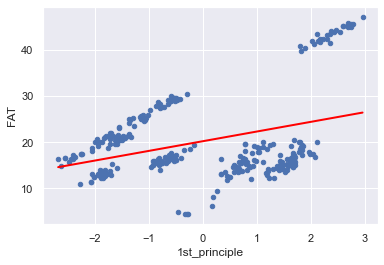

In [93]:

dataframe.plot(kind='scatter', x='1st_principle', y='FAT')
plt.plot(X_new, preds, c='red', linewidth=2)

In [94]:
feature_cols2 = ['2nd_principle']
X = dataframe[feature_cols2]
y = dataframe['FAT']


# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)
# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

20.229533333333336
[4.00065438]


In [95]:
X_new = pd.DataFrame({'2nd_principle': [5]})
X_new.head()

,2nd_principle
0,5


In [96]:
lm.predict(X_new)

array([40.23280524])

In [97]:
X_new = pd.DataFrame({'2nd_principle': [dataframe['2nd_principle'].min(), dataframe['2nd_principle'].max()]})
X_new.head()

,2nd_principle
0,-2.632367
1,5.042441


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


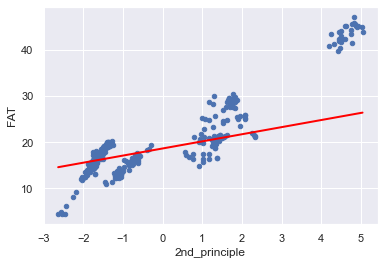

In [98]:
dataframe.plot(kind='scatter', x='2nd_principle', y='FAT')
plt.plot(X_new, preds, c='red', linewidth=2)

### Sir from my side, I do my  best  as per data requirement but this is not as it question requierd. This is extra work i added in this question because i want to perform linear regression which work properly with good accuray rate.
### As you see that i take "2nd principal" value as 5 which pridict "Fat" value is 41 where as original data value is 43.89 which is very good accuracy rate.

### Sir I hope this extra piece of code and work is not be reason for my deduction my marks.
### Thank you sir...